In [60]:
#importing data
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [61]:
#import seaborn, numpy and matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [62]:
#Preliminary review of data
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [66]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [68]:
print(df.head())

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [70]:
#Data Cleaning: Dropping medication columns that will not be used in my analysis

drop_cols=['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']

df.drop(drop_cols, inplace=True,axis=1)

In [72]:
#Confirmed that columns were dropped
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [74]:
#Descriptive Stats 

df[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [76]:
#Descriptive Stats on select Categorical Variables 

df[["patient_nbr", "race"]].groupby("race").count().sort_values('patient_nbr',ascending=False)

,patient_nbr
race,
Caucasian,76099
AfricanAmerican,19210
?,2273
Hispanic,2037
Other,1506
Asian,641


In [78]:
df[["patient_nbr", "gender"]].groupby("gender").count().sort_values('patient_nbr',ascending=False)

,patient_nbr
gender,
Female,54708
Male,47055
Unknown/Invalid,3


In [80]:
df[["patient_nbr", "age"]].groupby("age").count().sort_values('patient_nbr',ascending=False)

,patient_nbr
age,
[70-80),26068
[60-70),22483
[50-60),17256
[80-90),17197
[40-50),9685
[30-40),3775
[90-100),2793
[20-30),1657
[10-20),691


In [82]:
df[["patient_nbr", "A1Cresult"]].groupby("A1Cresult").count().sort_values('patient_nbr',ascending=False)

,patient_nbr
A1Cresult,
>8,8216
Norm,4990
>7,3812


In [84]:
df[["patient_nbr", "change"]].groupby("change").count().sort_values('patient_nbr',ascending=False)

,patient_nbr
change,
No,54755
Ch,47011


In [86]:
df[["patient_nbr", "diabetesMed"]].groupby("diabetesMed").count().sort_values('patient_nbr',ascending=False)

,patient_nbr
diabetesMed,
Yes,78363
No,23403


In [88]:
df[["patient_nbr", "readmitted"]].groupby("readmitted").count().sort_values('patient_nbr',ascending=False)

,patient_nbr
readmitted,
NO,54864
>30,35545
<30,11357


In [90]:
#Data Cleaning: Dropping additional columns that will not be used in my analysis

drop_cols=['payer_code','diag_1','diag_2','diag_3','max_glu_serum','medical_specialty','weight']

df.drop(drop_cols, inplace=True,axis=1)

In [92]:
#Confirmed that columns were dropped
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

In [94]:
#Table#1
df.groupby(["readmitted","gender"]).size().reset_index(name='count')

,readmitted,gender,count
0,<30,Female,6152
1,<30,Male,5205
2,>30,Female,19518
3,>30,Male,16027
4,NO,Female,29038
5,NO,Male,25823
6,NO,Unknown/Invalid,3


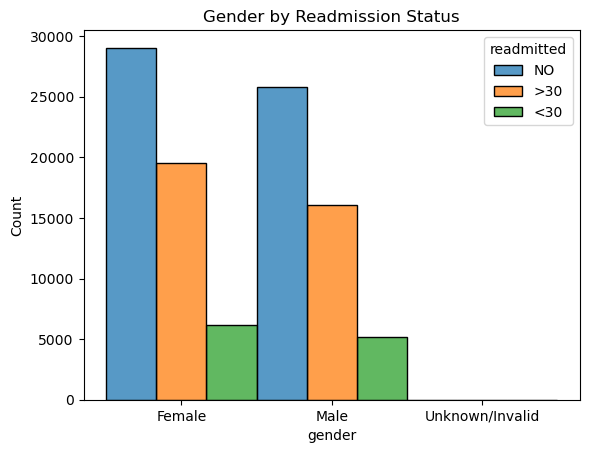

In [96]:
#Graph#1: Gender by Readmission Status

sns.histplot(binwidth=1,
            x="gender",
            hue="readmitted",
            data=df,
            stat="count",
            multiple="dodge").set_title("Gender by Readmission Status")

plt.show()

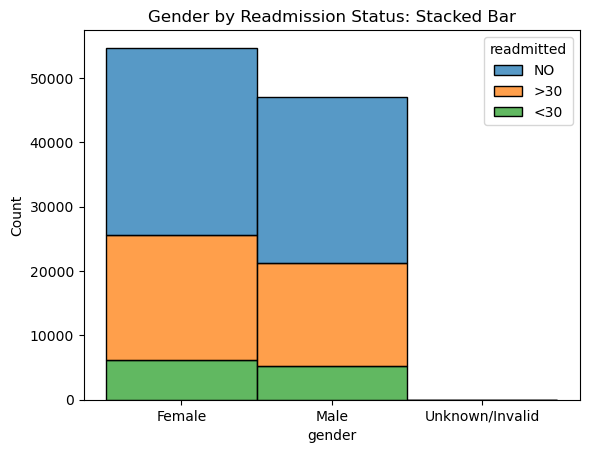

In [98]:
#Graph#2: Gender by Readmission Status (stacked bars)

sns.histplot(binwidth=0.5, x="gender", hue="readmitted", data=df, stat="count", multiple="stack").set_title("Gender by Readmission Status: Stacked Bar")
plt.show()

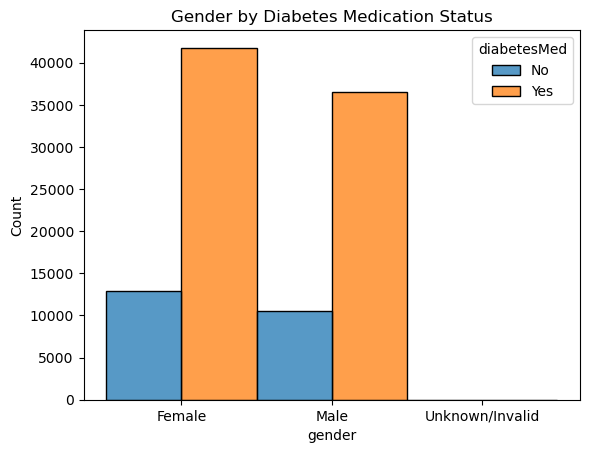

In [100]:
#Graph#3: Gender by Diabetes Medication

sns.histplot(binwidth=1,
            x="gender",
            hue="diabetesMed",
            data=df,
            stat="count",
            multiple="dodge").set_title("Gender by Diabetes Medication Status")

plt.show()

In [102]:
#Table#2
df.groupby(["diabetesMed","gender"]).size().reset_index(name='count')

,diabetesMed,gender,count
0,No,Female,12921
1,No,Male,10481
2,No,Unknown/Invalid,1
3,Yes,Female,41787
4,Yes,Male,36574
5,Yes,Unknown/Invalid,2


In [109]:
#Summmary: For my analysis, I focused on two comparisons: (1) gender and readmission status and, (2) gender and diabetes medication status. There were more females (n=54708) in the dataset than males (n=47055). When examining gender and readmission status, across both genders, a higher number of patients were not readmitted (n=54,861) than readmitted in > 30 days or < 30 days combined (n=46,902) - see table#1. In addition, a higher number of females were: not readmitted than males, readmitted >30 days than males and readmitted in <30 days than males; see graphs #1 and #2. My second comparison looked at gender and medication status. More females were on diabetes medication (n=41,787)than males(n=36,574). To complete this analysis several steps were taken including an exploratory analysis of data and data cleaning which included removing unnecessary columns.